In [1]:
import sys 
# locate to the working folder
# sys.path.append("D:\\GitHub\\Clone\\planning\\ruixuan")
from ruixuan.turning_scene import *
from l5kit.rasterization.rasterizer_builder import _load_metadata
import time
import pickle
import math
from collections import deque

In [8]:
original_result = np.load('SensAnalysis.npy')
result = np.array(original_result)
vvk=[]
for vk in range(2,6):
    arr_id = np.where(result[:,1]==vk)
    arr = result[arr_id]
    avg = np.mean(arr[:,3])
    vvk.append(avg)
print(vvk)

[0.25428749999999994, 0.2513374999999999, 0.25500416666666664, 0.2523895833333333]


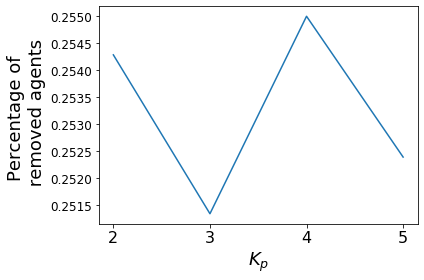

In [10]:
xdim = np.arange(2,6).astype(int).astype(str)
plt.plot(xdim, vvk)
plt.xlabel('$K_p$', fontsize=18)
plt.ylabel('Percentage of \n removed agents', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
# plt.ylim(0.225,0.265)
plt.tight_layout()
plt.savefig('sens_bgm_ped_new', dpi=100)
plt.show()

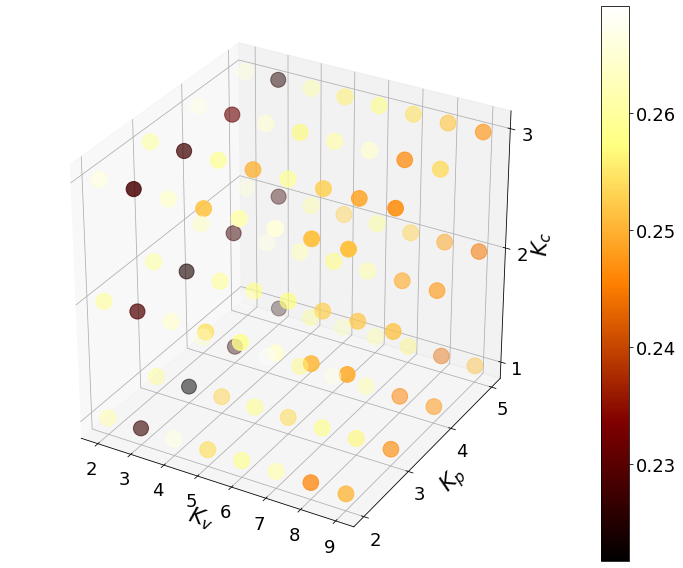

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator



fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')


img = ax.scatter(result[:,0], result[:,1], result[:,2], c=result[:,3], s=result[:,3]*1000, cmap=plt.get_cmap('afmhot'))
cbar= fig.colorbar(img)
ax.set_xlabel('$K_v$', fontsize=22)
ax.set_ylabel('$K_p$', fontsize=22)
ax.set_zlabel('$K_c$', fontsize=22)
# plt.title('Sensitivity anslysis on # components')
plt.tight_layout()
# ax = plt.figure().gca()

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.zaxis.set_major_locator(MaxNLocator(integer=True))
ax.tick_params(axis='x', labelsize= 18)
ax.tick_params(axis='y', labelsize= 18)
ax.tick_params(axis='z', labelsize= 18)

cbar.ax.tick_params(labelsize=18) 
plt.savefig("sensAnalysis_color")
plt.show()